# Mantis Finite Difference 
### Author: G. Papageorgiou
In this notebook we showcase the setup for our staggered grid, 2D anisotropic viscoelastic finite difference code in the mantis codebase.

In [1]:
%load_ext autoreload
%autoreload 2
import mantis_wave_modelling.finite_difference.parameter_handling as manFD


First we generate grids based on a layered model. This is coupled to the rock physics modelling library. Here for simplicity we choose the `generic` (identity) model.

In [2]:
input = {
    0: {"Top Depth": 0.0, "Vp": 2.82, "Vs": 1.25, "Rho": 2.35},
    1: {"Top Depth": 100.0, "Vp": 3.55, "Vs": 1.47, "Rho": 2.45},
    2: {"Top Depth": 300.0, "Vp": 2.94, "Vs": 1.36, "Rho": 2.37},
}
dic = {
    index: {"model": "generic", "parameters": {}}
    for index, _ in enumerate(input.keys())
}

From this model, we generate grids on which we run the finite difference code. The automatic grid generation generates laterally homogeneous, layered earth grids but more complex grids can be used

In [3]:
cij_grid = manFD.FiniteDifferenceGridFromRockPhysicsModels(
    well_input=input, mod_dictionary=dic, label="test"
)
cij_grid.save_modelling_grids(
    output_folder="wave_modelling_backend/test",
    n_x_grid_points=201,
    n_z_grid_points=101,
    dx=10.0,
    offset=500,
)

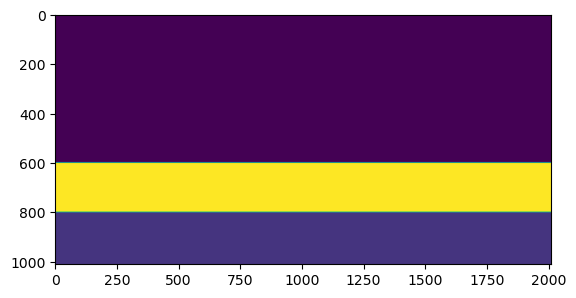

In [4]:
import numpy as np

with open("./wave_modelling_backend/test/a11.bin", "r") as f:
    a11 = np.fromfile(f, dtype=np.float32)
    a11 = a11.reshape(201, 101).T

import matplotlib.pyplot as plt
plt.imshow(a11, extent=[0, 2010, 1010, 0])

To generate a finite difference gather, we need a parameter file. We have two in this notebook's backend. Each key corresponds to a different parameter for setting up the finite difference model

In [10]:
for key, val in manFD.schema["properties"].items():
    print(f"{key:-<20}{val['description']:-<80}({val['type']})")

nxtot---------------total number of x grid points including nxabs-----------------------------------(integer)
nztot---------------total number of z grid points including nzabs-----------------------------------(integer)
nxabs---------------number of x  absorbing boundary points------------------------------------------(integer)
nzabs---------------number of z  absorbing boundary points------------------------------------------(integer)
dl------------------grid increment in meter---------------------------------------------------------(number)
nt------------------total number of time steps------------------------------------------------------(integer)
dt------------------time step increment in seconds--------------------------------------------------(number)
nsnap---------------number of snapshots for output--------------------------------------------------(integer)
fsnap---------------time step of first snapshot output----------------------------------------------(integer)
dsnap-------

We validate the parameter file and then run the finite difference simulation. We then visualize the results using the `matplotlib` library.

In [11]:
d = manFD.JsonParameterFile(filename= "./wave_modelling_backend/small_model.json")
d.validate_data()

Valid JSON


In [7]:
import mantis_wave_modelling.finite_difference.run_model as runFD

Finally, we run the simulation using the input parameter file for running and trace extraction:

In [8]:
runFD.main(runfile="./wave_modelling_backend/small_model_run.json")

Wavelet Parameters:
	Peak Freq. (Hz): 45.0	Time Length: 0.091	# of samples: 1819
	Wavelet type: Ricker

Grid Parameters:
	# time steps: 25001	inc: 5e-05 (s)
	nx=201		nz=101
	nxabs=50	nzabs=50	grid inc.=10.000000
	#snaps: 1	time[0]: 0.25	time[0]: 0.25
	#Sources: 9	Source type: t
		src# 1		x: 1500.0	z: 500.0
				pol_x: 1.0	pol_z: 1.0	pol_xz: 0.0
		src# 2		x: 1490.0	z: 510.0
				pol_x: 0.4	pol_z: 0.4	pol_xz: 0.0
		src# 3		x: 1490.0	z: 500.0
				pol_x: 0.6	pol_z: 0.6	pol_xz: 0.0
		src# 4		x: 1490.0	z: 490.0
				pol_x: 0.4	pol_z: 0.4	pol_xz: 0.0
		src# 5		x: 1500.0	z: 510.0
				pol_x: 0.6	pol_z: 0.6	pol_xz: 0.0
		src# 6		x: 1500.0	z: 490.0
				pol_x: 0.6	pol_z: 0.6	pol_xz: 0.0
		src# 7		x: 1510.0	z: 510.0
				pol_x: 0.4	pol_z: 0.4	pol_xz: 0.0
		src# 8		x: 1510.0	z: 500.0
				pol_x: 0.6	pol_z: 0.6	pol_xz: 0.0
		src# 9		x: 1510.0	z: 490.0
				pol_x: 0.4	pol_z: 0.4	pol_xz: 0.0
	#Rcvrs: 57



	Setting up Cij's

finished initializing Memory Variables

Reading Tau files

Setting up Tau's

Tau Matrix filled

Left Side PML Parameters:

	Grid Nodes     0	to	   50	 on process 0
	alpha_max: 141.371669	L: 500.000000
	d0x: 120.885717

	From Process 0
	x[  0]: 500.0	x[  0]/L: 1.00	bx[  0]: 0.994	  ax[0]: -0.006026
	x[  1]: 490.0	x[  1]/L: 0.98	bx[  1]: 0.9941	  ax[1]: -0.005788
	x[  2]: 480.0	x[  2]/L: 0.96	bx[  2]: 0.9942	  ax[2]: -0.005554
	x[  3]: 470.0	x[  3]/L: 0.94	bx[  3]: 0.9943	  ax[3]: -0.005325
	x[  4]: 460.0	x[  4]/L: 0.92	bx[  4]: 0.9943	  ax[4]: -0.005101
	x[  5]: 450.0	x[  5]/L: 0.90	bx[  5]: 0.9944	  ax[5]: -0.004882
	x[  6]: 440.0	x[  6]/L: 0.88	bx[  6]: 0.9945	  ax[6]: -0.004668
	x[  7]: 430.0	x[  7]/L: 0.86	bx[  7]: 0.9946	  ax[7]: -0.004458
	x[  8]: 420.0	x[  8]/L: 0.84	bx[  8]: 0.9946	  ax[8]: -0.004253
	x[  9]: 410.0	x[  9]/L: 0.82	bx[  9]: 0.9947	  ax[9]: -0.004053
	x[ 10]: 400.0	x[ 10]/L: 0.80	bx[ 10]: 0.9947	  ax[10]: -0.003858
	x[ 11]: 390.0	x[ 11]/L: 0.78	

The snapshot and traces are saved in a subdir within the grids dir (no binaries are saved in github apart from images within the notebook)

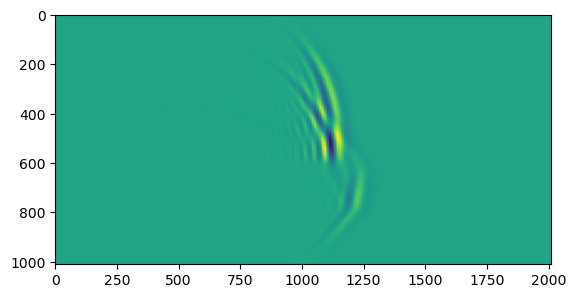

In [9]:
import numpy as np
import matplotlib.pyplot as plt
image = np.fromfile(
    "/Users/gpapageo/Documents/projects/mantis-core-examples/wave_modelling_backend/test/snapshots/P-0005000.bin",
    dtype=np.dtype("float32"),
).reshape(201, 101)[::-1].T
plt.imshow(image, extent=[0, 2010, 1010, 0])